In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import History
from keras import optimizers
import matplotlib.pyplot as plt


# **Loading Data**

In [ ]:
X=np.load("/content/drive/MyDrive/sign/X.npy")
Y=np.load("/content/drive/MyDrive/sign/Y.npy")

# **Splitting Data into training, testing and validation**

In [ ]:
x_train, x_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8)
x_valid, x_test, y_valid, y_test=train_test_split(x_rem,y_rem, test_size=0.5)

# **Model Architecture**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# **Model Configuration**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])

# **Model Training**

In [ ]:
history=model.fit(x_train,y_train,validation_data=[x_valid, y_valid], epochs=10, batch_size=20)

Epoch 1/10
83/83 [==============================] - 21s 240ms/step - loss: 2.3061 - acc: 0.1152 - val_loss: 2.2424 - val_acc: 0.2427
Epoch 2/10
83/83 [==============================] - 13s 151ms/step - loss: 1.3691 - acc: 0.5106 - val_loss: 0.6762 - val_acc: 0.7913
Epoch 3/10
83/83 [==============================] - 12s 142ms/step - loss: 0.5054 - acc: 0.8217 - val_loss: 0.4422 - val_acc: 0.8204
Epoch 4/10
83/83 [==============================] - 12s 139ms/step - loss: 0.2535 - acc: 0.9181 - val_loss: 0.3113 - val_acc: 0.8883
Epoch 5/10
83/83 [==============================] - 12s 139ms/step - loss: 0.1592 - acc: 0.9460 - val_loss: 0.2364 - val_acc: 0.9223
Epoch 6/10
83/83 [==============================] - 11s 138ms/step - loss: 0.1077 - acc: 0.9697 - val_loss: 0.1225 - val_acc: 0.9563
Epoch 7/10
83/83 [==============================] - 11s 138ms/step - loss: 0.0644 - acc: 0.9800 - val_loss: 0.1285 - val_acc: 0.9660
Epoch 8/10
83/83 [==============================] - 12s 139ms/step - 

# **Model Testing**

In [ ]:
loss, accuracy=model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 48ms/step - loss: 0.1040 - acc: 0.9517


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
dic=history.history
dic.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

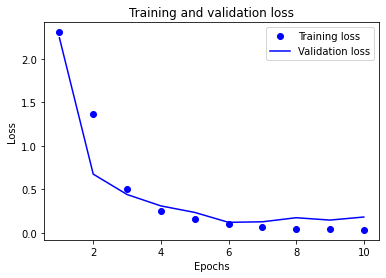

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('b_loss')
plt.show()

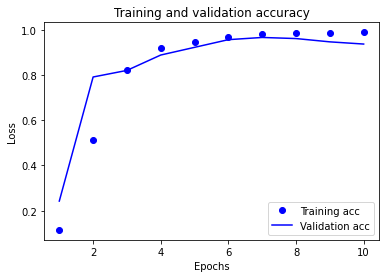

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('b_acc')
plt.show()